In [1]:
import sys
import os
sys.path.insert(0, '../magcolloids')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML, clear_output
import scipy.optimize as spo
import scipy.spatial as spa 
import magcolloids as mgc
import matplotlib as mpl
import string as st
import support as sp

from tqdm.auto import tqdm

ureg = mgc.ureg

idx = pd.IndexSlice

%reload_ext autoreload
%autoreload 2

In [2]:
mpl.rc("figure",dpi=150)
mpl.rc("figure",figsize=(3,2))
mpl.rc("text",usetex=True)

In [3]:
data_IvsT = pd.read_hdf("../Data/Processed/23_07_25_Script5_current_vs_time.hdf",
                 key = "current_vs_time")
data_IvsT = data_IvsT.reorder_levels(["parity","tilt","time"])

index = pd.read_hdf("../Data/Processed/23_07_25_Script5_currents.hdf",
                 key = "index")

In [4]:
data_IvsT.head()

I_x        I_y      var_x     var_y    N
parity tilt time                                                  
odd    24   0.0000        NaN        NaN        NaN       NaN    0
            0.0167  31.178950  11.041568  14.536300  6.102019  239
            0.0334   7.782465   4.677422   7.552632  6.252726  239
            0.0501  -7.446968  -3.828738   5.747485  5.385403  239
            0.0668 -13.092765  -4.675443   8.877868  5.077030  239

In [5]:
data_IvsT["I"] = np.sqrt(data_IvsT.I_x**2+data_IvsT.I_y**2)

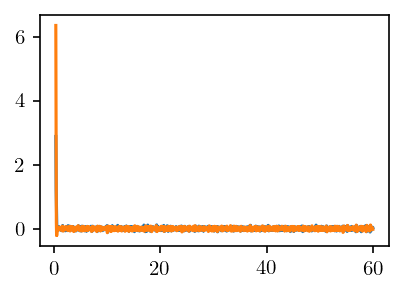

In [6]:
plt.plot(data_IvsT.loc["even"].loc[0].I_x.rolling(20).mean())
plt.plot(data_IvsT.loc["even"].loc[0].I_y.rolling(20).mean())

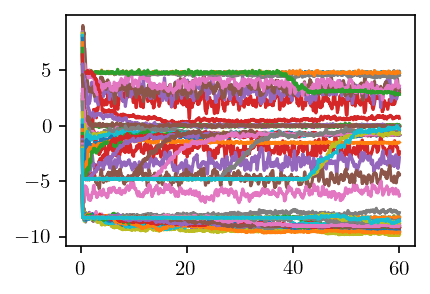

In [7]:
for i, data_i in data_IvsT.loc["even"].groupby("tilt"):
    L = plt.plot(data_IvsT.loc["even"].loc[i].I_x.rolling(20).mean())
    plt.plot(data_IvsT.loc["even"].loc[i].I_y.rolling(20).mean(),
            color = L[0].get_color())

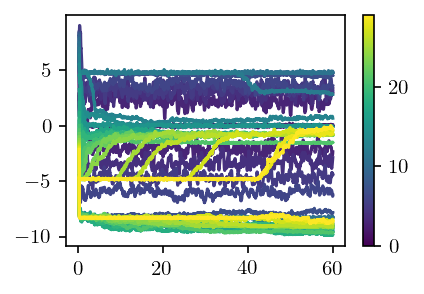

In [8]:
tilts = data_IvsT.index.get_level_values("tilt").unique()
cmap = mpl.colormaps["viridis"]
norm = mpl.colors.Normalize(min(tilts), max(tilts))

for i, data_i in data_IvsT.loc["even"].groupby("tilt"):
    plt.plot(data_IvsT.loc["even"].loc[i].I_x.rolling(20).mean(),
            color = cmap(norm(i)))
    plt.plot(data_IvsT.loc["even"].loc[i].I_y.rolling(20).mean(),
            color = cmap(norm(i)))
    
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax = plt.gca())

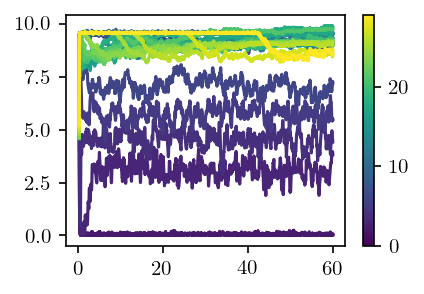

In [9]:
tilts = data_IvsT.index.get_level_values("tilt").unique()
cmap = mpl.colormaps["viridis"]
norm = mpl.colors.Normalize(min(tilts), max(tilts))

for i, data_i in data_IvsT.loc["even"].groupby("tilt"):
    
    I = np.sqrt(data_IvsT.loc["even"].loc[i].I_x.rolling(20).mean()**2+\
        data_IvsT.loc["even"].loc[i].I_y.rolling(20).mean()**2)

    plt.plot(I,color = cmap(norm(i)))
    
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax = plt.gca())

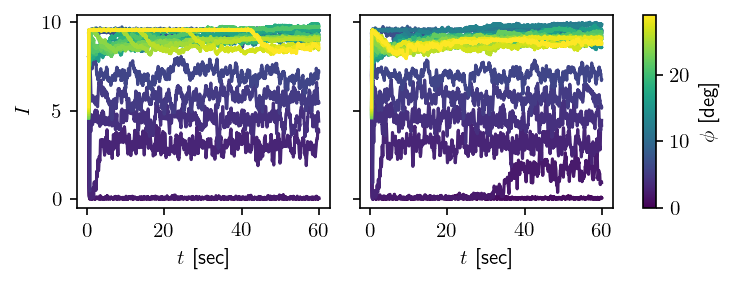

In [10]:
fig, ax = plt.subplots(1,3, figsize=(5,2),
                       width_ratios = [1,1, 0.05],
                       tight_layout=True)

tilts = data_IvsT.index.get_level_values("tilt").unique()
cmap = mpl.colormaps["viridis"]
norm = mpl.colors.Normalize(min(tilts), max(tilts))

for i, data_i in data_IvsT.loc["even"].groupby("tilt"):
    
    I = np.sqrt(data_IvsT.loc["even"].loc[i].I_x.rolling(20).mean()**2+\
        data_IvsT.loc["even"].loc[i].I_y.rolling(20).mean()**2)

    ax[0].plot(I,color = cmap(norm(i)))
    
    I = np.sqrt(data_IvsT.loc["odd"].loc[i].I_x.rolling(20).mean()**2+\
        data_IvsT.loc["odd"].loc[i].I_y.rolling(20).mean()**2)

    ax[1].plot(I,color = cmap(norm(i)))
    
    
ax[0].set_ylabel("$I$")
ax[0].set_xlabel("$t$ [sec]")
ax[1].set_xlabel("$t$ [sec]")

ax[1].set_ylim(ax[0].get_ylim())
ax[1].tick_params("y",labelleft=False)
#ax[1].set_yticks([])
    
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax = ax[2],
             label = "$\phi$ [deg]")


### Save the smooth dataset

In [11]:
data_IvsT_smooth = data_IvsT.groupby(level=["parity","tilt"],).rolling(20).mean()
data_IvsT_smooth = data_IvsT_smooth.droplevel([2,3]).filter(["I_x","I_y"])
data_IvsT_smooth["I"] = data_IvsT_smooth.eval("sqrt(I_x**2+I_y**2)")

data_IvsT_smooth.head()

data_IvsT_smooth.to_hdf("../Data/Processed/23_07_25_Script5_current_vs_time.hdf",
                 key = "current_vs_time_smooth")

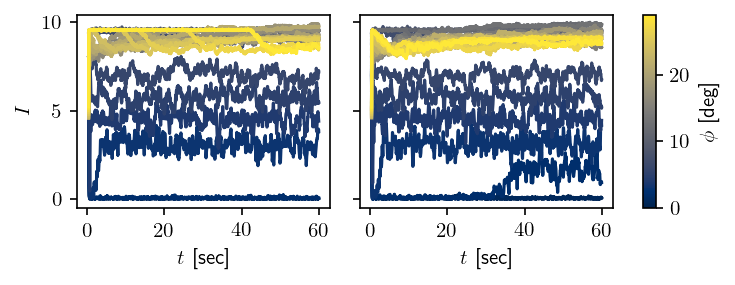

In [12]:
data_IvsT_smooth = pd.read_hdf("../Data/Processed/23_07_25_Script5_current_vs_time.hdf",
                 key = "current_vs_time_smooth")

fig, ax = plt.subplots(1,3, figsize=(5,2),
                       width_ratios = [1,1, 0.05],
                       tight_layout=True, facecolor="white")

tilts = data_IvsT.index.get_level_values("tilt").unique()
cmap = mpl.colormaps["cividis"]
norm = mpl.colors.Normalize(min(tilts), max(tilts))

for phi in np.sort(tilts):

    ax[0].plot(data_IvsT_smooth.loc["even"].loc[phi].I, color = cmap(norm(phi)))

    ax[1].plot(data_IvsT_smooth.loc["odd"].loc[phi].I, color = cmap(norm(phi)))
    
    
ax[0].set_ylabel("$I$")
ax[0].set_xlabel("$t$ [sec]")
ax[1].set_xlabel("$t$ [sec]")

ax[1].set_ylim(ax[0].get_ylim())
ax[1].tick_params("y",labelleft=False)
#ax[1].set_yticks([])
    
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax = ax[2],
             label = "$\phi$ [deg]")


# Visualize final value of the current vs tilt angle $\phi$

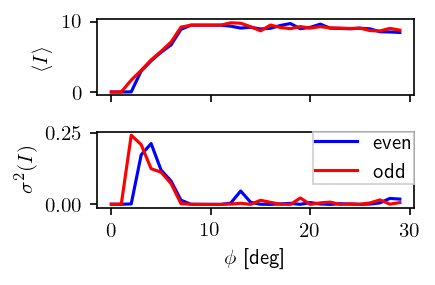

In [13]:
data_IvsPhi = data_IvsT_smooth.query("time>50").groupby(["parity","tilt"]).mean()

fig, ax = plt.subplots(2,1, sharex=True,
                       figsize=(3,2), facecolor="white",
                       tight_layout=True)

color = ["blue","red"]

ax[0].plot(data_IvsPhi.loc["even"].I,color = color[0])
ax[0].plot(data_IvsPhi.loc["odd"].I,color = color[1])

data_IvsPhi_var = data_IvsT_smooth.query("time>50").groupby(["parity","tilt"]).var()

ax[1].plot(data_IvsPhi_var.loc["even"].I, color[0], label="even")
ax[1].plot(data_IvsPhi_var.loc["odd"].I, color[1], label="odd")

ax[1].set_xlabel("$\phi$ [deg]")
ax[1].set_ylabel("$\sigma^2(I)$")
ax[0].set_ylabel(r"$\left<I\right>$")

ax[1].legend(
    fancybox=False,
    borderpad=0.1,
    bbox_to_anchor=(1,1),borderaxespad=0
            )

# A video of the strange behavior for high tilt in the even parity case

In [14]:
entry = index.query("parity=='even' & tilt == 29").iloc[0]

In [15]:
entry

file          Tilt_29_deg_h3899_2023_07_23_18_32_56
height                                          3.9
tilt                                             29
max_frame                                    599864
parity                                         even
fid_origin                                       24
Name: 54, dtype: object

In [16]:
trj = pd.read_hdf("../Data/Processed/23_07_25_Script5_currents.hdf",
                 key = entry.file)
bounds = pd.read_hdf("../Data/Processed/23_07_25_Script5_currents.hdf",
                 key = "bounds/"+entry.file)

In [17]:
frames = trj.index.get_level_values("frame").unique()
anim = mgc.animate_trj(trj.loc[frames[::20]],
                       region = bounds.iloc[0],
                       radius = 1.4, framerate = 2, verb = False)

In [18]:
len(frames[::20])

180

In [19]:
%%time
vid = anim.to_html5_video()

CPU times: user 49.1 s, sys: 168 ms, total: 49.3 s
Wall time: 49.8 s


In [20]:
HTML(vid)

### Why are there initial shifts? 

In [21]:
frames = trj.index.get_level_values("frame").unique()
anim = mgc.animate_trj(trj.loc[frames[:200:1]],
                       region = bounds.iloc[0],
                       radius = 1.4, framerate = 20, verb = False)

In [22]:
%%time
vid = anim.to_html5_video()

CPU times: user 1min, sys: 188 ms, total: 1min 1s
Wall time: 1min 1s


In [23]:
HTML(vid)

### Why are there initial shifts? 

In [24]:
frames

Int64Index([     0,    167,    334,    501,    668,    835,   1002,   1169,
              1336,   1503,
            ...
            598361, 598528, 598695, 598862, 599029, 599196, 599363, 599530,
            599697, 599864],
           dtype='int64', name='frame', length=3593)

In [25]:
frames = trj.index.get_level_values("frame").unique()
anim = mgc.animate_trj(trj.loc[frames[-200:-1:1]],
                       region = bounds.iloc[0],
                       radius = 1.4, framerate = 20, verb = False)

In [26]:
%%time
vid = anim.to_html5_video()

CPU times: user 59.6 s, sys: 172 ms, total: 59.8 s
Wall time: 1min


In [27]:
HTML(vid)